# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\nuzha\Videos\2023-Tutorials-main\2023-Tutorials-main\data\states_edu.csv")
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Load in the "states_edu.csv" dataset and take a look at the head of the data

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE* Grade 4 math

How many years of data are logged in our dataset? 

In [2]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?


In [3]:
new_df = df.groupby('STATE').agg({'AVG_MATH_4_SCORE': ['mean']})
print("ohio average 4th grade math score: ", new_df.loc['OHIO'])
print("ohio average 4th grade math score: ", new_df.loc['MICHIGAN'])

ohio average 4th grade math score:  AVG_MATH_4_SCORE  mean    239.454545
Name: OHIO, dtype: float64
ohio average 4th grade math score:  AVG_MATH_4_SCORE  mean    234.363636
Name: MICHIGAN, dtype: float64


Find the average for your chosen test across all states in 2019

In [4]:
df_year = df.groupby('YEAR').agg({'AVG_MATH_4_SCORE': ['mean']})
print(df_year.loc[2019])

AVG_MATH_4_SCORE  mean    239.943396
Name: 2019, dtype: float64


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [5]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [6]:
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G']
df['expenditure_per_student']

0       3.627221
1       7.939520
2       5.050774
3       3.948044
4       5.164536
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: expenditure_per_student, Length: 1715, dtype: float64

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
I want to compare govt expenditure vs students performance

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Avg Math 4 Score')

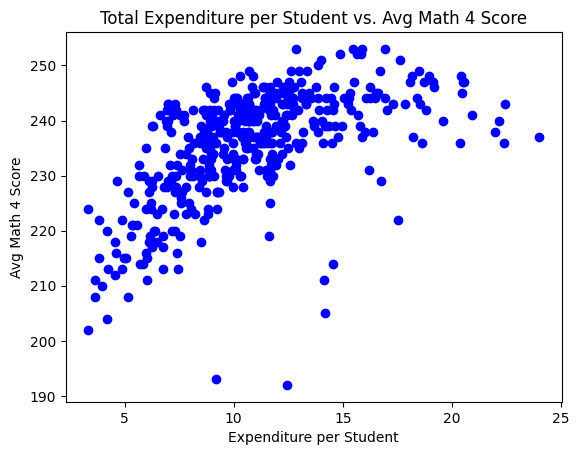

In [7]:
plt.scatter(df['expenditure_per_student'], df['AVG_MATH_4_SCORE'], color='blue')
plt.title('Total Expenditure per Student vs. Avg Math 4 Score')
plt.xlabel('Expenditure per Student')
plt.ylabel('Avg Math 4 Score')


**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0.5, 0, 'Instruction Expenditure per Student')

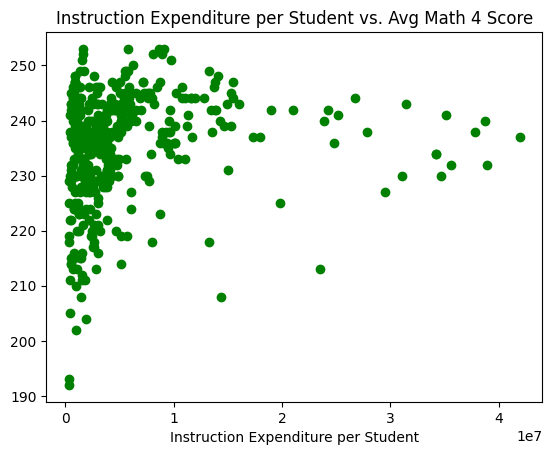

In [8]:
plt.scatter(df['INSTRUCTION_EXPENDITURE'], df['AVG_MATH_4_SCORE'], color='green')
plt.title('Instruction Expenditure per Student vs. Avg Math 4 Score')
plt.xlabel('Instruction Expenditure per Student')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
df = df.dropna(subset=['expenditure_per_student', 'INSTRUCTION_EXPENDITURE','AVG_MATH_4_SCORE'])


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['expenditure_per_student', 'INSTRUCTION_EXPENDITURE']]
y = df['AVG_MATH_4_SCORE']
print(X.isna().sum())  # Check for NaNs in features
print(y.isna().sum())  # Check for NaNs in target


expenditure_per_student    0
INSTRUCTION_EXPENDITURE    0
dtype: int64
0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2 , random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [15]:
# create your model here
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [18]:
print(model.intercept_)
print(model.coef_)

220.10575398832955
[ 1.49374174e+00 -8.18661145e-08]


In [19]:
model.score(X_test, y_test)

0.38360498507822294

In [20]:
np.mean(model.predict(X_test)-y_test)

0.9493710708936637

In [21]:
np.mean(np.abs(model.predict(X_test)-y_test))

6.075885167410457

In [22]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

7.884463111471744

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

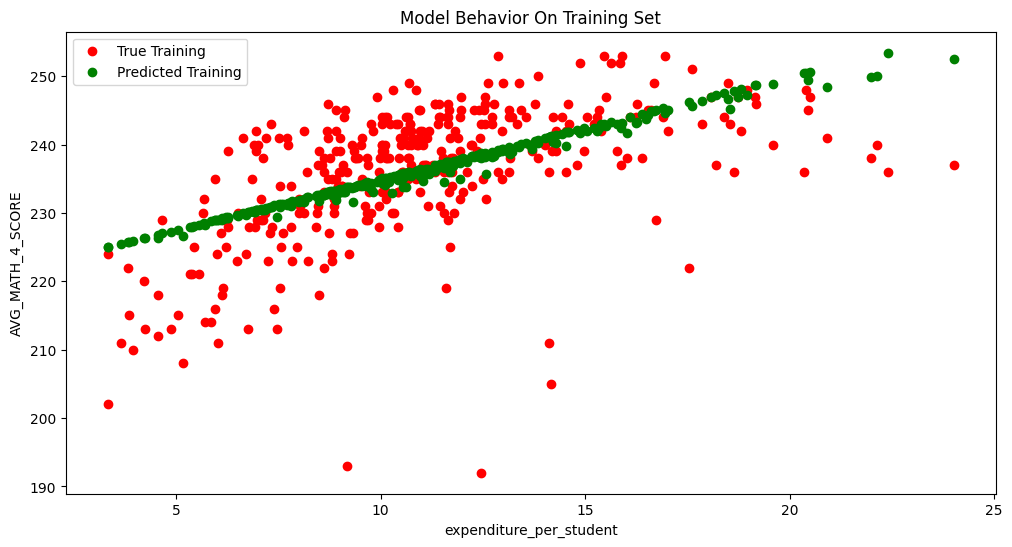

In [27]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

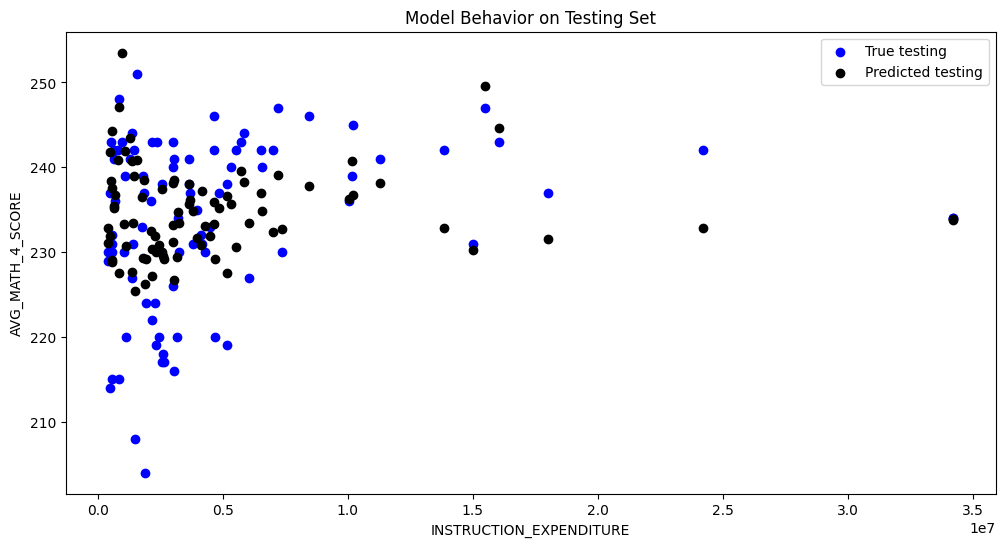

In [28]:
col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

The model was trained with some data and tested with the rest. It scored 0.3836, showing it can guess 38.36% of math scores right. This was not a appropriate model. It makes an average mistake of about 6 to 8 points in the scores.

Looking at graphs, spending more money per student usually means better math scores. Spending on teaching does not bring any significant difference